In [2]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Graduate Student Instructor's (GSI's) Defense ##

In [4]:
# Midterm scores of students in each section
scores = Table.read_table('scores_by_section.csv')
scores

Section,Midterm
1,22
2,12
2,23
2,14
1,20
3,25
4,19
1,24
5,8
6,14


In [5]:
# Number of students in each section
scores.group('Section')

Section,count
1,32
2,32
3,27
4,30
5,33
6,32
7,24
8,29
9,30
10,34


In [6]:
# Average midterm score of each section. Average of section 3 is the lowest and students blame the instructor
scores.group('Section', np.average).show()

Section,Midterm average
1,15.5938
2,15.125
3,13.6667
4,14.7667
5,17.4545
6,15.0312
7,16.625
8,16.3103
9,14.5667
10,15.2353


In [7]:
# Randomly select 27 students (number of students in section 3 is 27) from all students
random_sample = scores.sample(27, with_replacement = False)
random_sample

Section,Midterm
4,13
1,19
4,15
5,16
9,11
9,4
5,15
11,18
10,16
9,17


In [8]:
#... And calculate the average
np.average(random_sample.column('Midterm'))

14.518518518518519

In [10]:
random_sample = scores.sample(27, with_replacement = False)
np.average(random_sample.column('Midterm'))

15.62962962962963

In [11]:
# Repeat the random selection of 27 students for 50000 times and calculate and store the average score (test statistic) for each
averages = make_array()

for i in np.arange(50000):
    random_sample = scores.sample(27, with_replacement = False)
    new_average = np.average(random_sample.column('Midterm'))
    averages = np.append(averages, new_average)    

In [12]:
# observed average (observed test statistic) in Section 3 was 13.6667 
observed_average = 13.6667

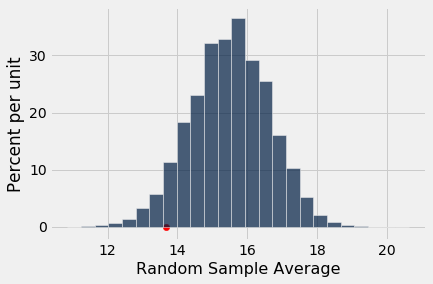

In [13]:
# Draw the empirical distribution of averages (test statistic)
# Don't worry about how the red dot was drawn. It shows the observed test statistic
Table().with_column('Random Sample Average', averages).hist(bins = 25)
plots.scatter(observed_average, 0, color = 'red', s=40);

In [11]:
# P-value (observed significance level): Probability of getting the observed test statistic (average of Section 3) or lower 
np.count_nonzero(averages <= observed_average) / 50000

0.05606

In [12]:
# Probability of getting 13.6 or lower is roughly %5. Statistical significance cut-off point
np.count_nonzero(averages <= 13.6) / 50000

0.04966

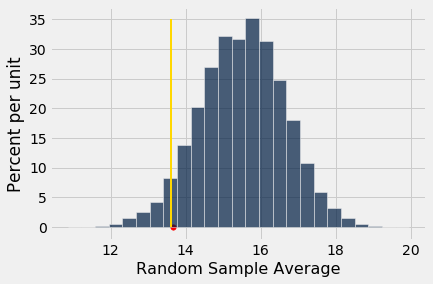

In [13]:
#
Table().with_column('Random Sample Average', averages).hist(bins = 25)
plots.scatter(observed_average, 0, color='red', s=30)
plots.plot([13.6, 13.6], [0, 0.35], color='gold', lw=2);